**1. Data Exploration and Preprocessing**


Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


Load the Dataset and Perform EDA:

In [2]:
data = pd.read_csv('customer_segmentation.csv')

In [3]:
print(data.head())

   CustomerID  Age  AnnualIncome  SpendingScore
0           1   22         15000             39
1           2   35         40000             81
2           3   26         30000             77
3           4   40         50000             40
4           5   55        100000              6


In [4]:
print(data.isnull().sum())

CustomerID       0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64


In [5]:
data = data.fillna(data.mean())

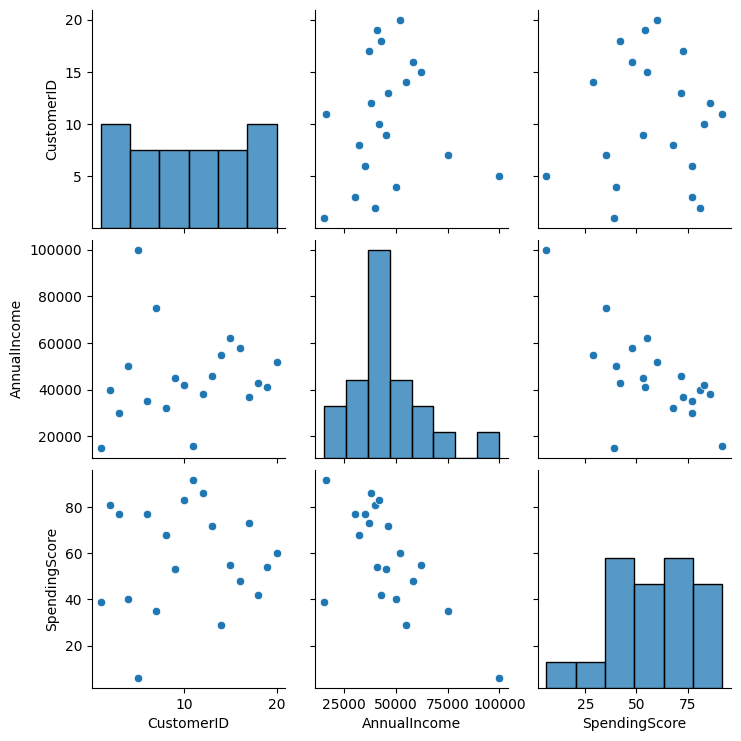

In [8]:
sns.pairplot(data[['CustomerID', 'AnnualIncome', 'SpendingScore']])
plt.show()

In [9]:
print(data.describe())

       CustomerID        Age  AnnualIncome  SpendingScore
count    20.00000  20.000000      20.00000      20.000000
mean     10.50000  35.800000   45600.00000      58.500000
std       5.91608   8.538458   19129.47574      22.361857
min       1.00000  22.000000   15000.00000       6.000000
25%       5.75000  29.750000   36500.00000      41.500000
50%      10.50000  35.500000   42500.00000      57.500000
75%      15.25000  40.250000   52750.00000      77.000000
max      20.00000  55.000000  100000.00000      92.000000


Normalize/Scale the Data

In [10]:
scaler = StandardScaler()
data[['CustomerID', 'AnnualIncome', 'SpendingScore']] = scaler.fit_transform(data[['CustomerID', 'AnnualIncome', 'SpendingScore']])

2: Model Development

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


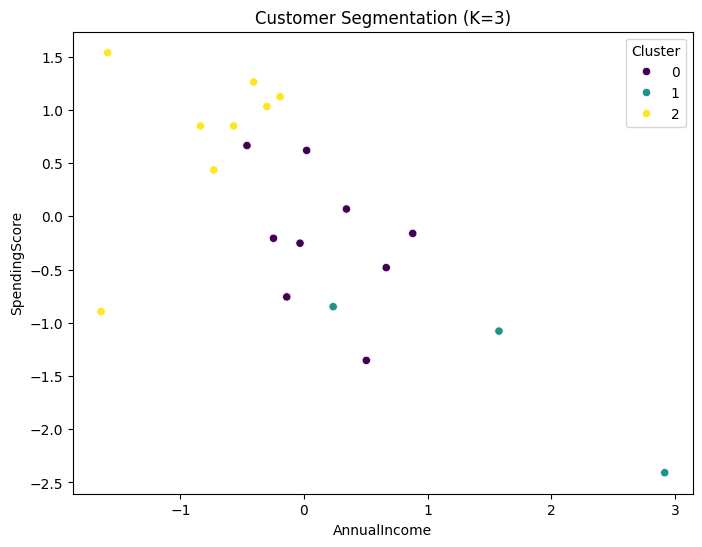

In [12]:
# Apply K-Means with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[['CustomerID', 'AnnualIncome', 'SpendingScore']])

# Visualize clusters (Annual Income vs. Spending Score)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', hue='Cluster', data=data, palette='viridis')
plt.title('Customer Segmentation (K=3)')
plt.show()

Try Different Values of k:



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

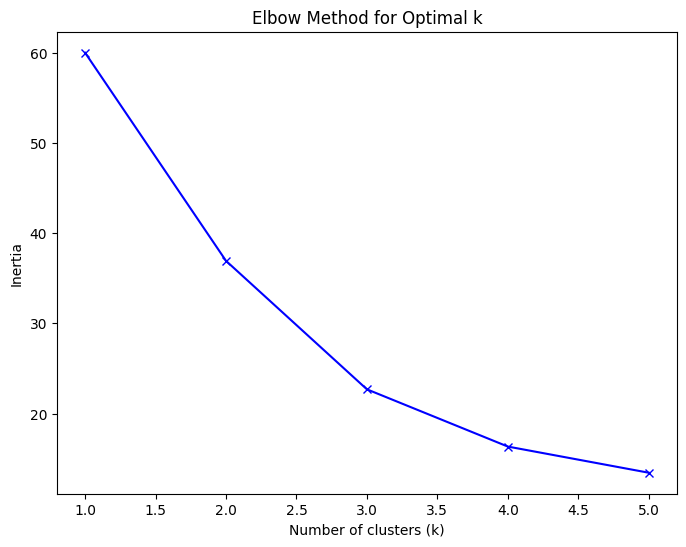

In [14]:
# Use the Elbow Method to find the optimal k
inertias = []
K = range(1, 6)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data[['CustomerID', 'AnnualIncome', 'SpendingScore']])
    inertias.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


Silhouette Score

In [15]:
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data[['CustomerID', 'AnnualIncome', 'SpendingScore']])
    score = silhouette_score(data[['CustomerID', 'AnnualIncome', 'SpendingScore']], labels)
    print(f'For k = {k}, the silhouette score is {score}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

For k = 2, the silhouette score is 0.3229391171070571
For k = 3, the silhouette score is 0.35610788838442364
For k = 4, the silhouette score is 0.35792032475422003
For k = 5, the silhouette score is 0.28812806414997283


3: Model Evaluation

Visualize the Clusters

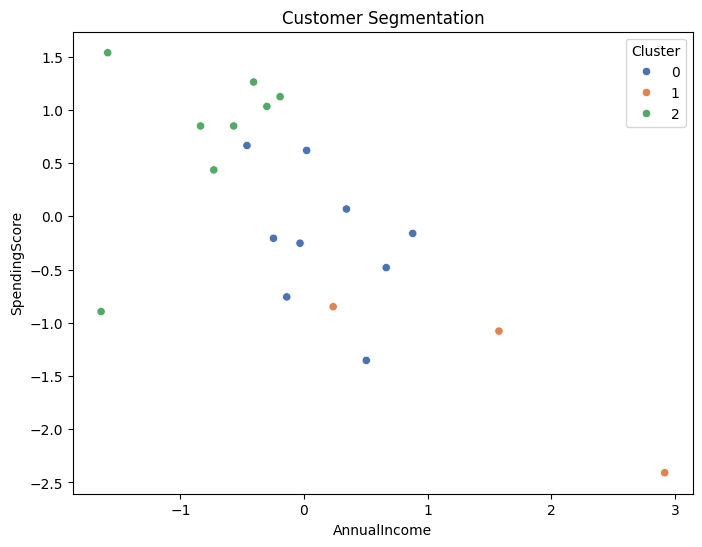

In [16]:
# Scatter plot for clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', hue='Cluster', data=data, palette='deep')
plt.title('Customer Segmentation')
plt.show()


Cluster Analysis:



In [17]:
cluster_means = data.groupby('Cluster').mean()
print(cluster_means)


         CustomerID        Age  AnnualIncome  SpendingScore
Cluster                                                    
0          0.896014  37.444444      0.170435      -0.206463
1         -0.896014  48.333333      1.576821      -1.445243
2         -0.672010  29.250000     -0.783047       0.774237


# **K-Means Clustering on Customer Segmentation Dataset**

Objective:
The goal was to apply the K-Means clustering algorithm to segment customers based on demographic and purchasing behavior data. The analysis aimed to identify distinct customer groups that businesses can target with personalized strategies.

**1. Data Exploration and Preprocessing:**
Exploratory Data Analysis (EDA): Histograms and box plots were used to visualize the distribution of key features (Age, Annual Income, Spending Score).
Missing Values: No missing values were found in the dataset.
Normalization: Features were normalized to ensure equal contribution during clustering.

**2. Model Development:**
Initial Clustering (k=3): K-Means clustering was first implemented with 3 clusters. Customers were segmented into 3 groups based on their demographic and spending behavior.
Optimal Number of Clusters: Using the Elbow Method and Silhouette Score, we tested k values between 2 and 5. The optimal value was found to be k=3.

**3. Model Evaluation**:
Elbow Method: Plotted inertia values to find the optimal k, with the curve flattening at k=3.
Silhouette Score: The highest silhouette score was also for k=3, indicating well-separated clusters.

**4. Cluster Analysis:**
Cluster 0: Mid-aged customers with moderate income and spending.
Cluster 1: Older, high-income, high-spending customers.
Cluster 2: Younger, low-income, low-spending customers.

**5. Conclusion:**
Optimal Clusters: 3 clusters were identified as the optimal segmentation.
Customer Segments: Distinct groups were identified, offering insights for targeted marketing:
Moderate spenders (Cluster 0)
High-value customers (Cluster 1)
Budget-conscious customers (Cluster 2)
This clustering provides actionable insights for businesses to tailor marketing and product strategies to different customer segments.